In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

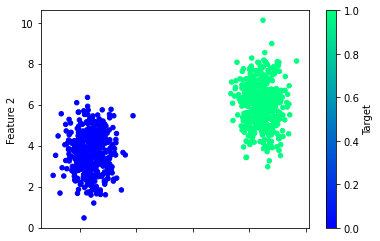

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DF with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [3]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [4]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [5]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [6]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [8]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [9]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [11]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 0s 584us/step - loss: 1.1565 - accuracy: 0.0507
Epoch 2/100
24/24 [==============================] - 0s 542us/step - loss: 1.1090 - accuracy: 0.0240
Epoch 3/100
24/24 [==============================] - 0s 542us/step - loss: 1.0661 - accuracy: 0.0280
Epoch 4/100
24/24 [==============================] - 0s 500us/step - loss: 1.0277 - accuracy: 0.0413
Epoch 5/100
24/24 [==============================] - 0s 500us/step - loss: 0.9930 - accuracy: 0.0640
Epoch 6/100
24/24 [==============================] - 0s 500us/step - loss: 0.9620 - accuracy: 0.0813
Epoch 7/100
24/24 [==============================] - 0s 542us/step - loss: 0.9354 - accuracy: 0.1000
Epoch 8/100
24/24 [==============================] - 0s 542us/step - loss: 0.9112 - accuracy: 0.1280
Epoch 9/100
24/24 [==============================] - 0s 542us/step - loss: 0.8900 - accuracy: 0.1493
Epoch 10/100
24/24 [==============================] - 0s 500us/step - loss: 0.8711 - accura

24/24 [==============================] - 0s 500us/step - loss: 0.4316 - accuracy: 0.8587
Epoch 82/100
24/24 [==============================] - 0s 542us/step - loss: 0.4247 - accuracy: 0.8627
Epoch 83/100
24/24 [==============================] - 0s 542us/step - loss: 0.4180 - accuracy: 0.8680
Epoch 84/100
24/24 [==============================] - 0s 500us/step - loss: 0.4112 - accuracy: 0.8720
Epoch 85/100
24/24 [==============================] - 0s 542us/step - loss: 0.4045 - accuracy: 0.8760
Epoch 86/100
24/24 [==============================] - 0s 542us/step - loss: 0.3977 - accuracy: 0.8787
Epoch 87/100
24/24 [==============================] - 0s 542us/step - loss: 0.3910 - accuracy: 0.8800
Epoch 88/100
24/24 [==============================] - 0s 500us/step - loss: 0.3845 - accuracy: 0.8827
Epoch 89/100
24/24 [==============================] - 0s 500us/step - loss: 0.3782 - accuracy: 0.8840
Epoch 90/100
24/24 [==============================] - 0s 500us/step - loss: 0.3719 - accuracy: 